In [7]:
!nvidia-smi
!pip install keras==2.1.6
!pip install emnist
%tensorflow_version 1.x

Thu Jul 30 08:54:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    73W / 149W |  10522MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
from model import create_model
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from emnist import extract_training_samples, extract_test_samples

train_images, train_labels = extract_training_samples("byclass")

test_images, test_labels = extract_test_samples('byclass')

from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# データセットの画像の前処理
train_images = train_images.reshape((-1, train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((-1, train_images.shape[1], train_images.shape[2], 1))

# dataset label preprocessing
train_labels = to_categorical(train_labels,62)
test_labels = to_categorical(test_labels,62)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(train_images)

# Create a model
model = create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
__________

/content/model.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
/content/model.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  model.add(Convolution2D(32, 3, 3))
/content/model.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  model.add(Convolution2D(64, 3, 3))
/content/model.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  model.add(Convolution2D(64, 3, 3))


In [ ]:
# 学習
batch_size = 8192

history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=batch_size),
                    steps_per_epoch=len(train_images) / batch_size, epochs=100)

model.save("model.h5")
# model = load_model("model.h5")

Epoch 1/100
86/85 [==============================] - 215s 2s/step - loss: 3.6981 - acc: 0.0579
Epoch 2/100
86/85 [==============================] - 214s 2s/step - loss: 3.4945 - acc: 0.1255
Epoch 3/100
86/85 [==============================] - 215s 3s/step - loss: 3.1359 - acc: 0.1976
Epoch 4/100
86/85 [==============================] - 215s 2s/step - loss: 2.8164 - acc: 0.2654
Epoch 5/100
86/85 [==============================] - 215s 3s/step - loss: 2.5388 - acc: 0.3221
Epoch 6/100
86/85 [==============================] - 215s 2s/step - loss: 2.2892 - acc: 0.3771
Epoch 7/100
86/85 [==============================] - 216s 3s/step - loss: 2.0826 - acc: 0.4246
Epoch 8/100
86/85 [==============================] - 215s 2s/step - loss: 1.9124 - acc: 0.4644
Epoch 9/100
86/85 [==============================] - 215s 2s/step - loss: 1.7652 - acc: 0.4990
Epoch 10/100
86/85 [==============================] - 214s 2s/step - loss: 1.6504 - acc: 0.5265
Epoch 11/100
86/85 [=============================

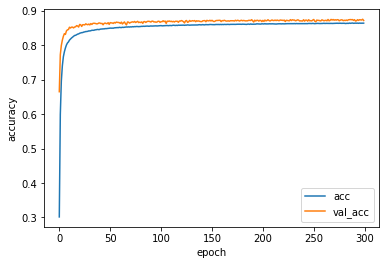

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

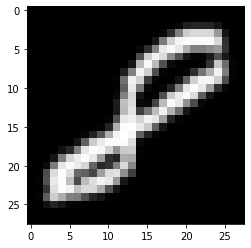

[[6.13245675e-07 5.05675793e-01 3.11087945e-07 9.52303552e-08
  1.97270606e-06 6.48340745e-07 2.26030551e-07 3.16346450e-06
  4.55468907e-08 2.15274810e-07 3.69939784e-07 1.21459409e-09
  7.20021774e-07 2.05394329e-07 1.35692246e-09 6.92335846e-07
  2.48751348e-08 7.37713322e-07 7.02291280e-02 4.73955915e-05
  4.15851389e-08 2.50896464e-05 8.31049007e-08 6.98314125e-06
  3.28764315e-07 1.22643348e-06 2.02672865e-08 1.24572852e-09
  5.56631932e-08 1.60113450e-05 4.01632315e-06 1.21460935e-05
  2.50187373e-08 1.94250198e-08 1.26584082e-05 3.61065062e-08
  6.56440591e-09 1.31215586e-06 3.12825989e-07 8.08096411e-06
  1.65380399e-07 3.20741583e-06 1.00796385e-07 6.50627226e-06
  5.00336930e-04 1.05581596e-04 7.50575353e-08 4.23294157e-01
  9.00886743e-09 1.93719825e-06 2.09758198e-07 3.34845367e-07
  1.76297050e-07 1.65899257e-06 8.22938233e-08 2.82780002e-05
  8.09086089e-07 4.42649980e-06 4.27004121e-09 1.61192713e-08
  1.13188605e-06 8.96310581e-09]
 [6.22820517e-06 2.59824007e-09 3.638

In [ ]:
# 評価
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc))

# 推論する画像の表示
for i in range(10):
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

# 推論したラベルの表示
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)